In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display
display.clear_output()
!yolo mode  =checks

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 772, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=<module 'ultralytics.utils.checks' from '/usr/local/lib/python3.10/dist-packages/ultralytics/utils/checks.py'>'. Valid modes are {'predict', 'export', 'train', 'benchmark', 'track', 'val'}.

    Arguments received: ['yolo', 'mode', '=checks']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'segment', 'detect', 'classify', 'obb', 'pose'}
                MODE (required) is one of {'predict', 'export', 'train', 'benchmark', 'track', 'val'}
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS a

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="8rXPVbRnolx15Yto5Emn")
project = rf.workspace("fruitcaloriesprediction").project("fruit-calories")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.100, to fix: `pip install ultralytics==8.0.196`


In [ ]:
!yolo task=segment mode=train model=yolov8m-seg.pt data={dataset.location}/data.yaml epochs=100 imgsz=640 plots=True

100% 52.4M/52.4M [00:00<00:00, 222MB/s]
Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8m-seg.pt, data=/content/fruit-calories-3/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

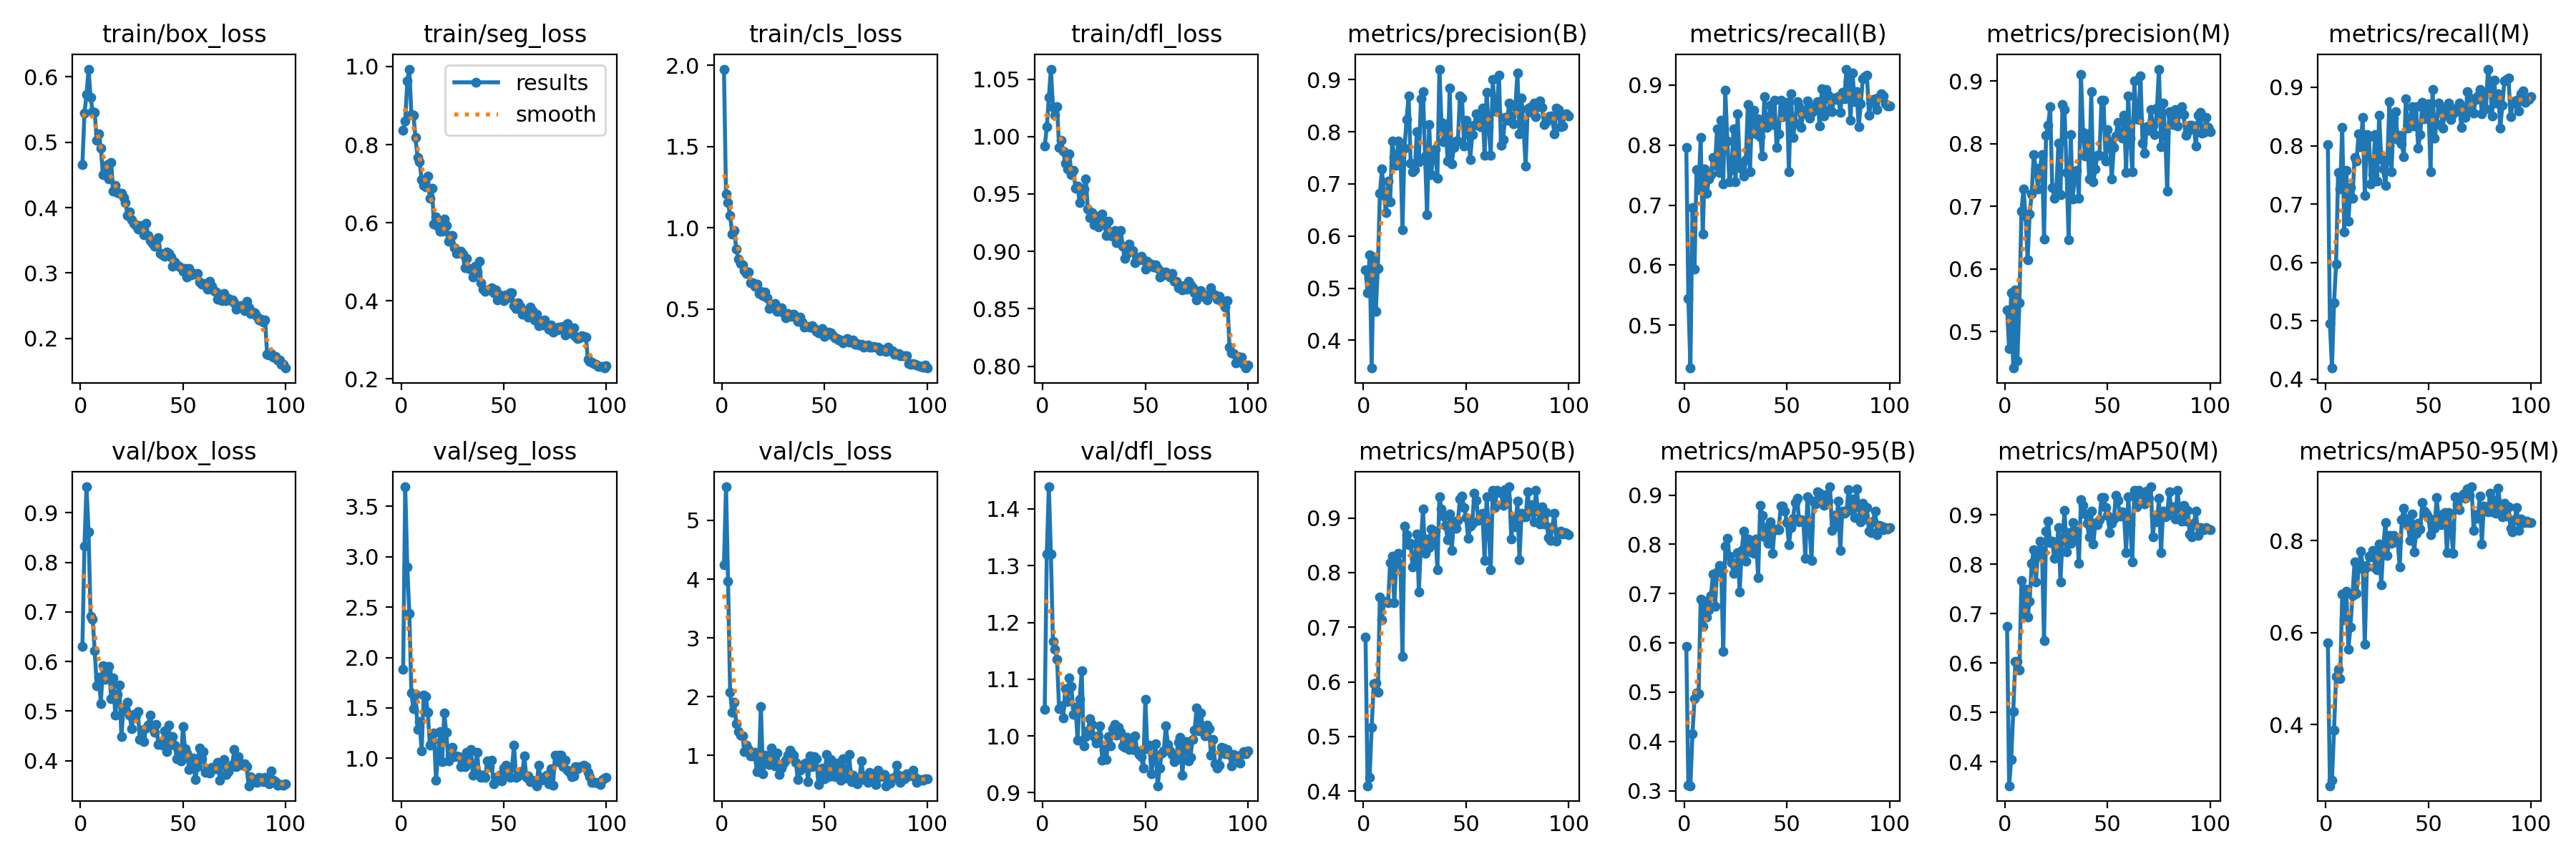

In [ ]:
Image(filename=f'/content/runs/segment/train/results.png', width=900)


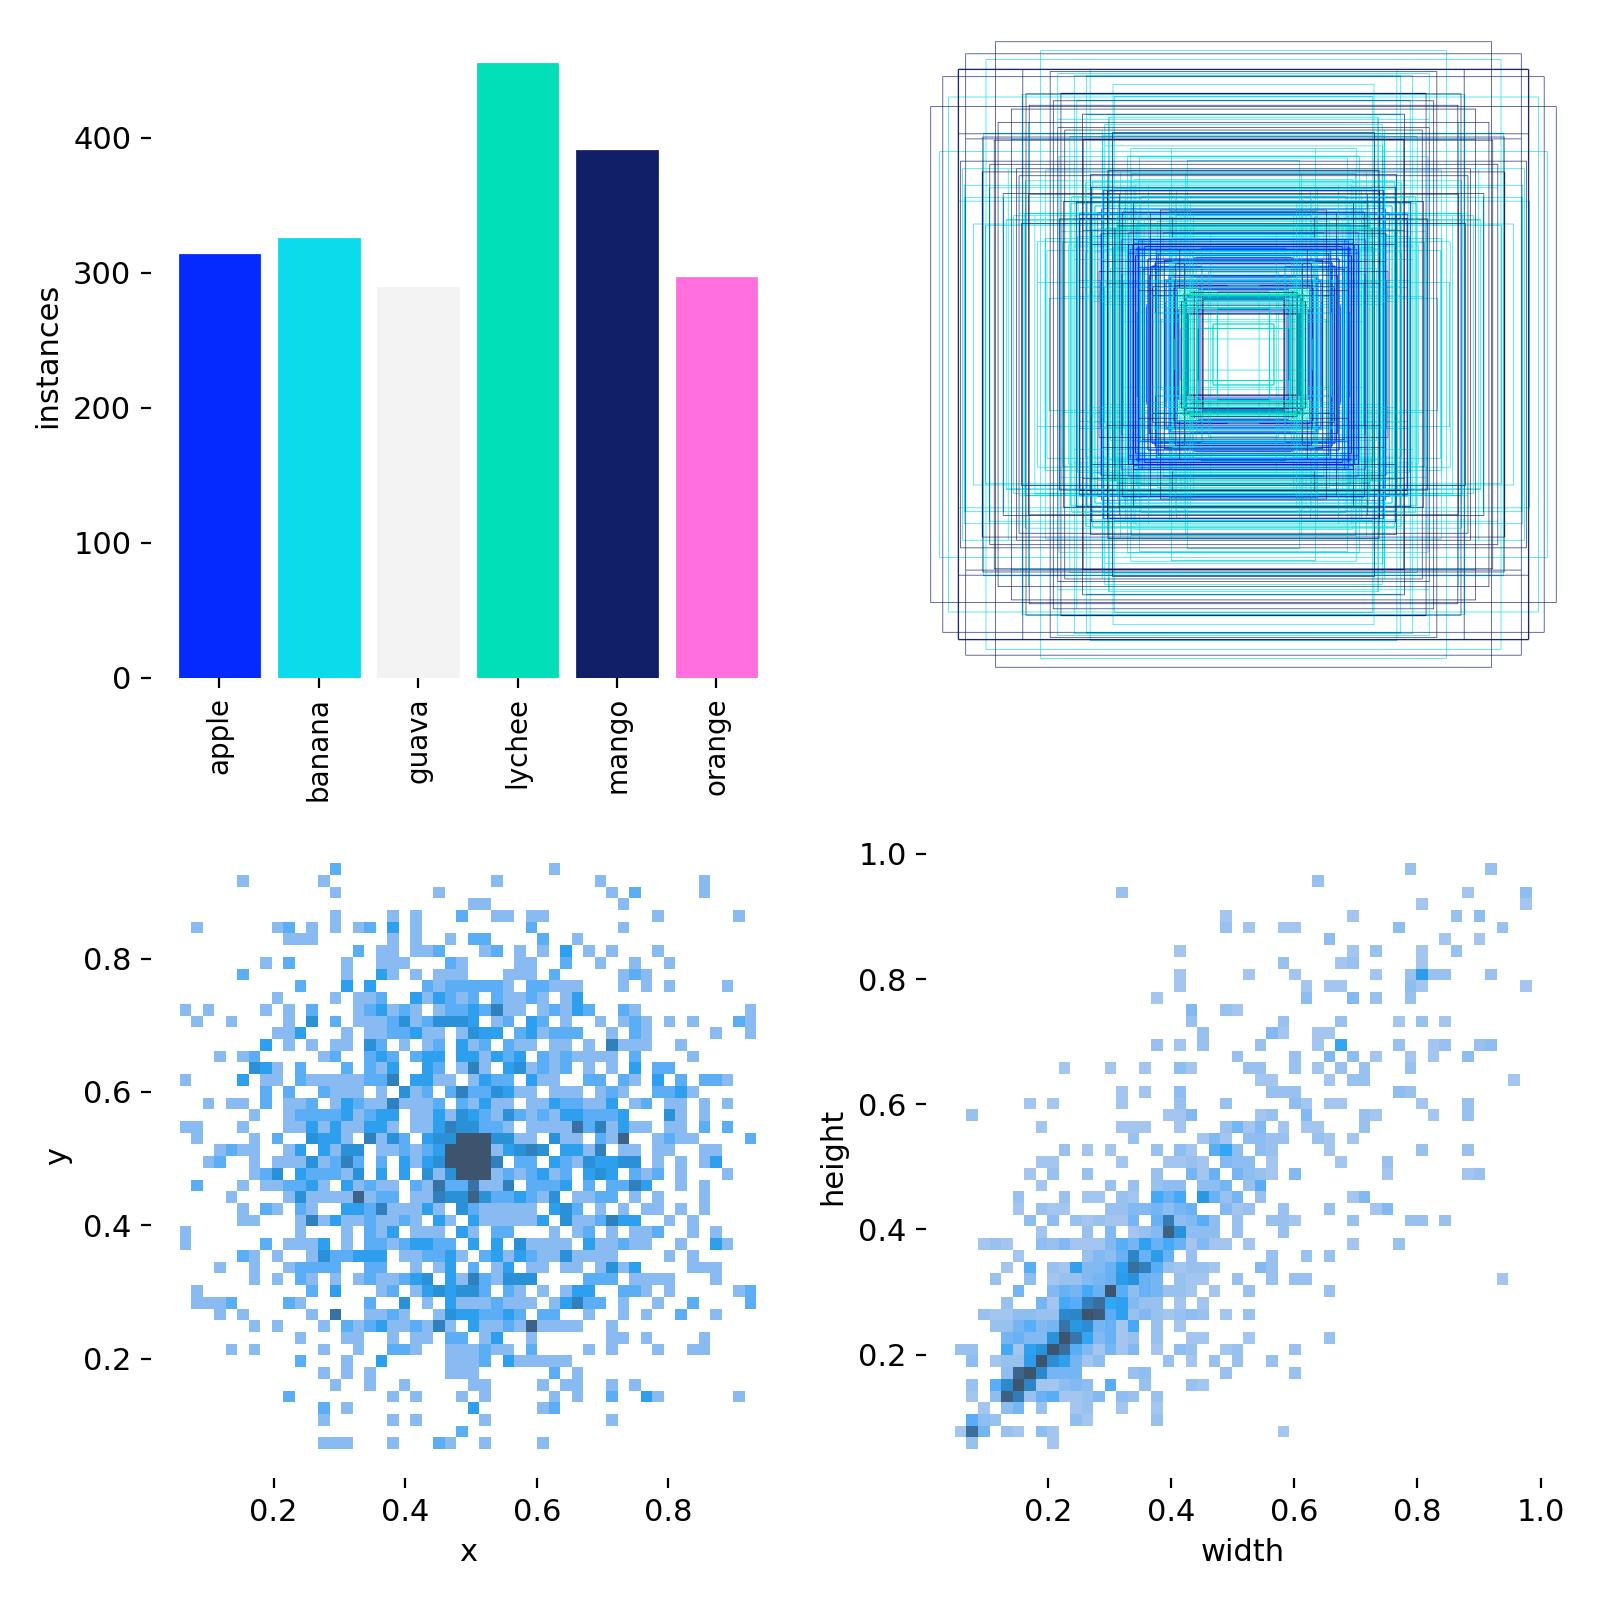

In [ ]:
Image(filename=f'/content/runs/segment/train/labels.jpg', width=900)


In [ ]:
!yolo task=segment mode=val model=/content/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,225,858 parameters, 0 gradients, 110.0 GFLOPs
val: Scanning /content/fruit-calories-3/valid/labels.cache... 27 images, 0 backgrounds, 0 corrupt: 100% 27/27 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.47s/it]
                   all         27         89      0.855      0.859      0.956      0.917      0.855      0.859      0.956      0.915
                 apple          4          6          1      0.711      0.995      0.995          1      0.711      0.995      0.995
                banana         10         20      0.847      0.831      0.871      0.728      0.847      0.831      0.871      0.724
                 guava          1          2      0.359          1      0.995      0.995      0.359          1      0.995      0

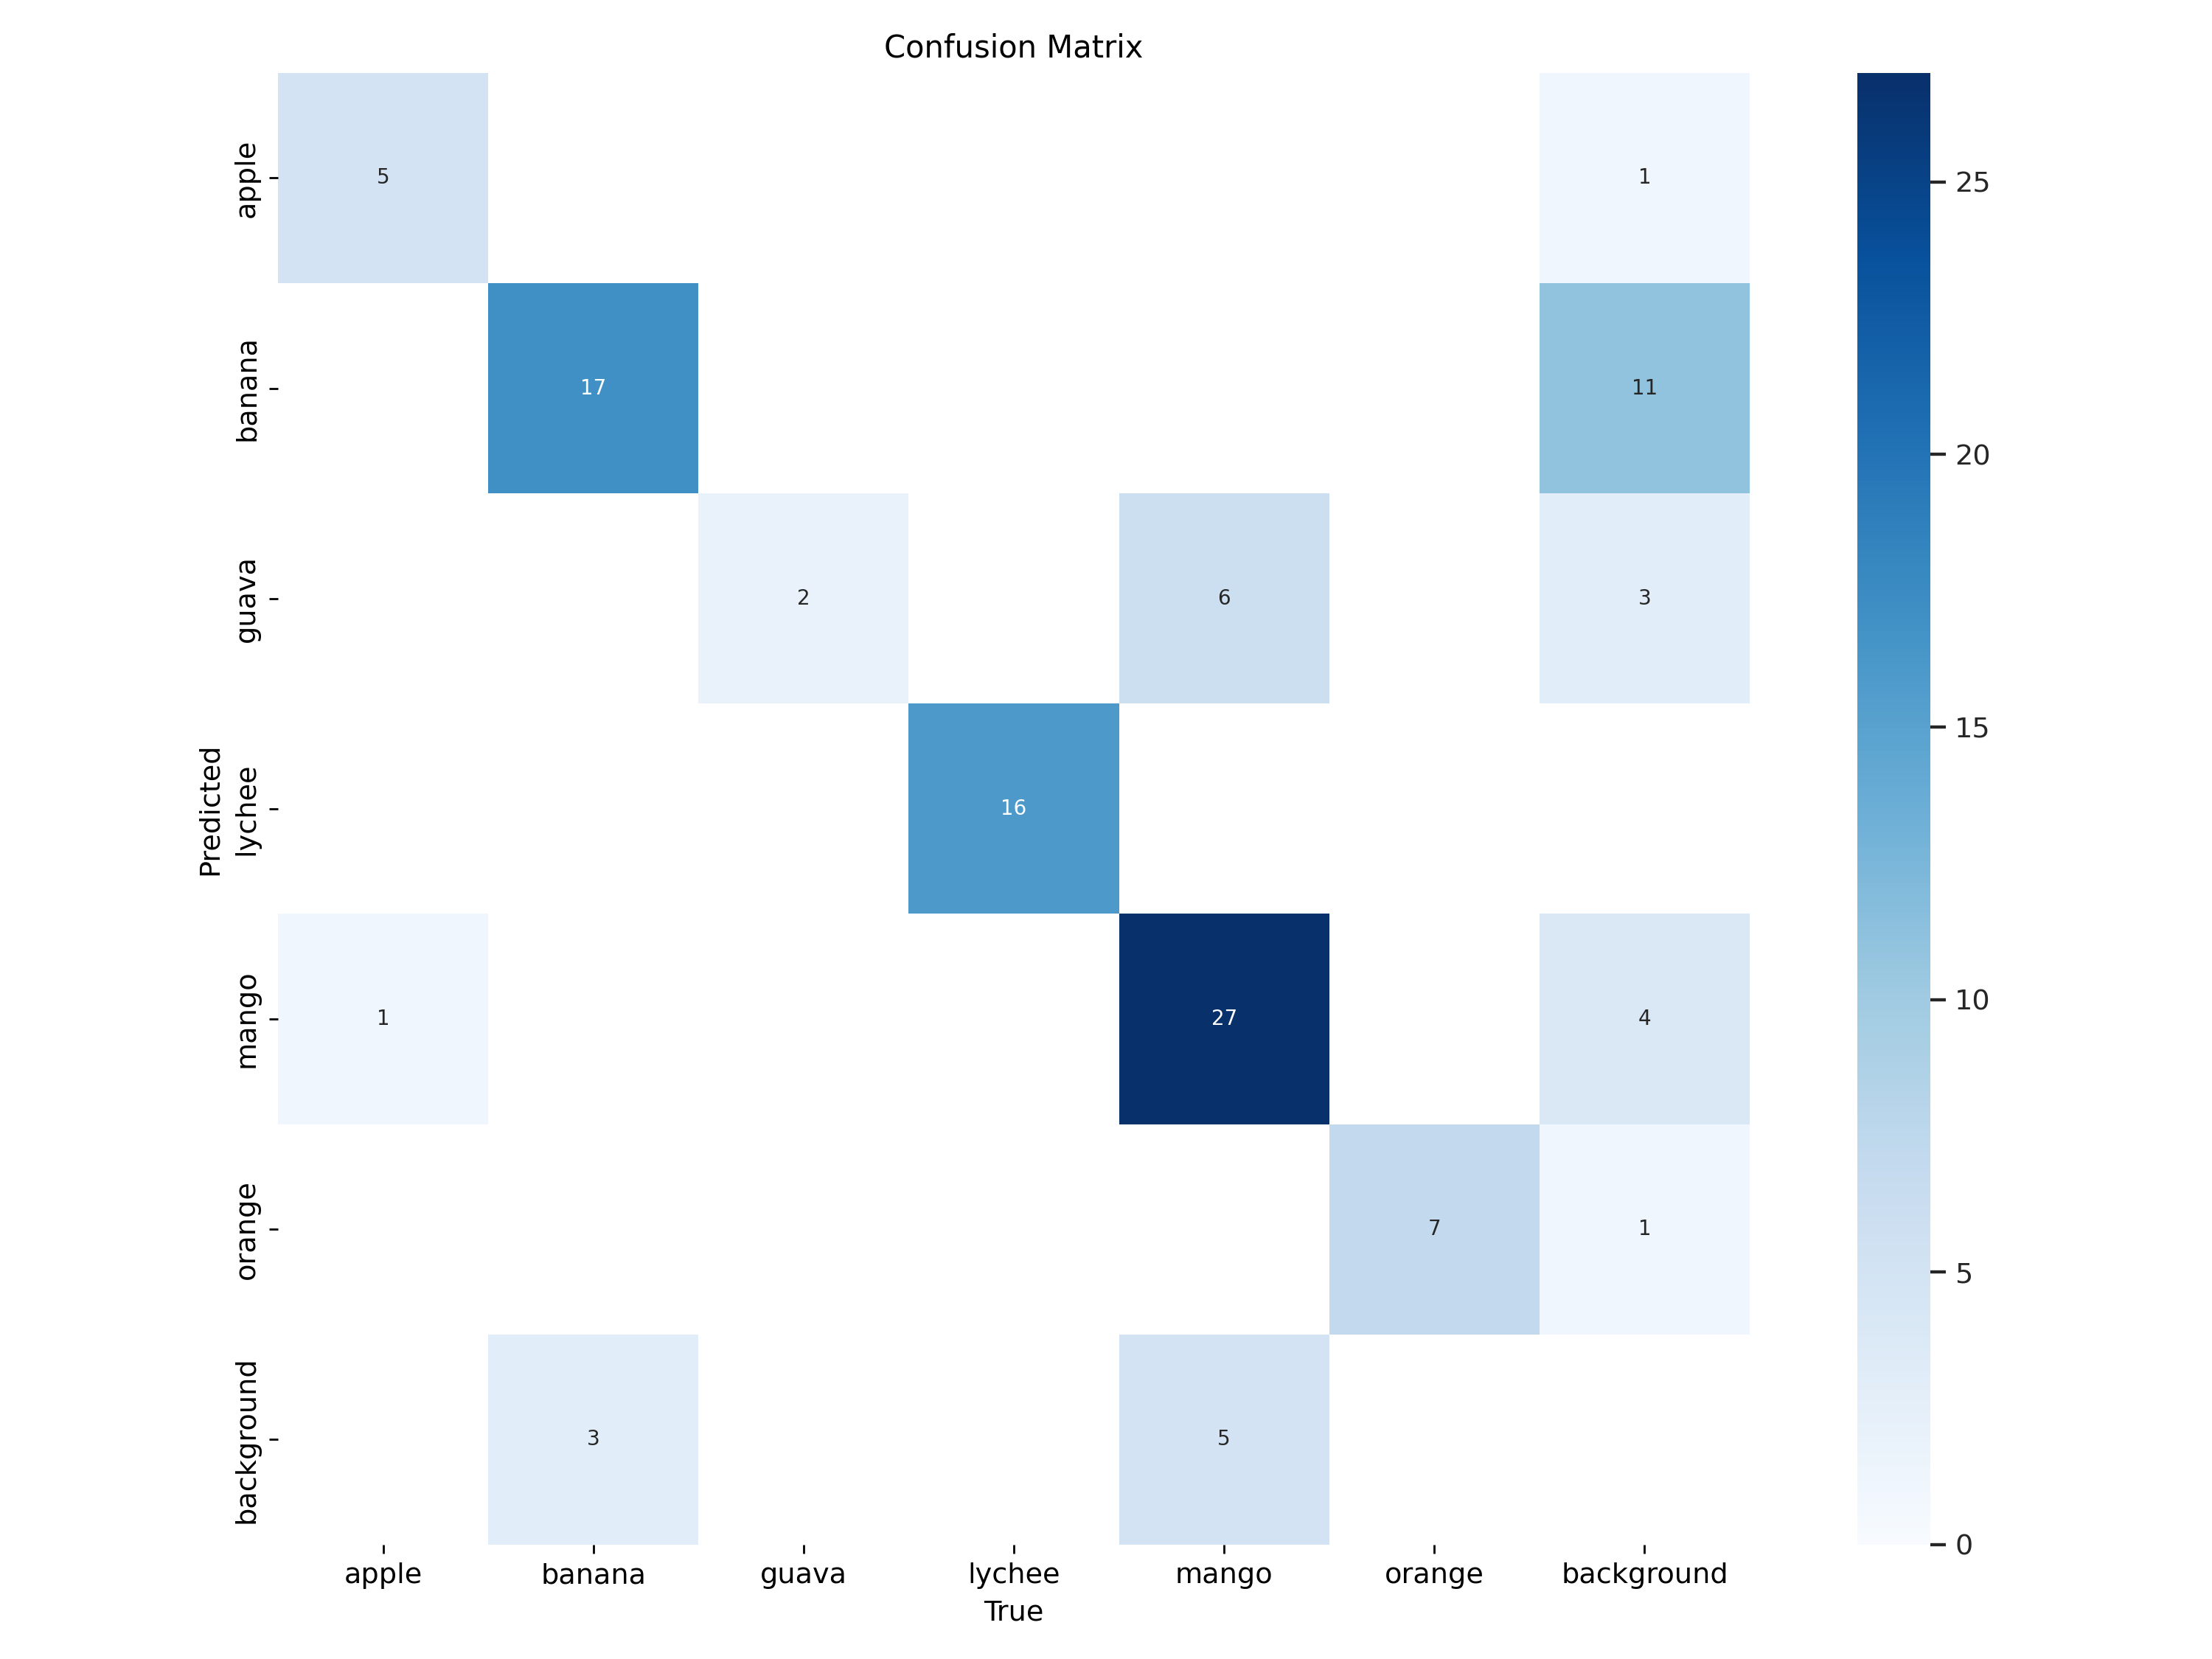

In [ ]:
Image(filename=f'/content/runs/segment/val/confusion_matrix.png', width=900)


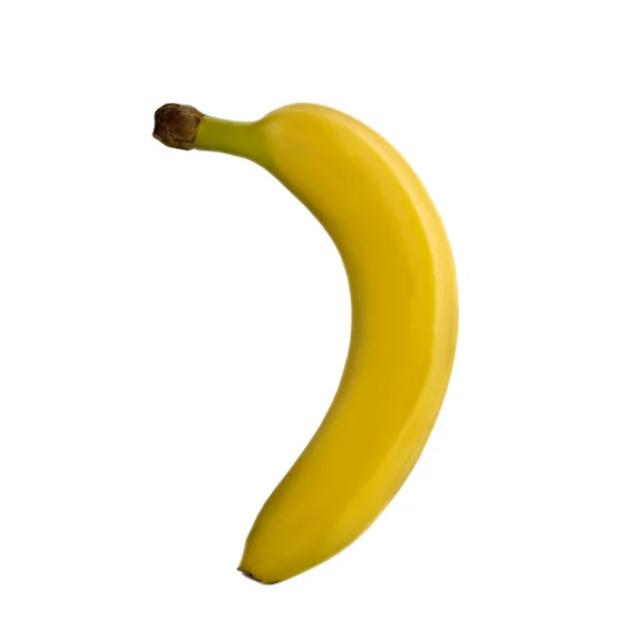

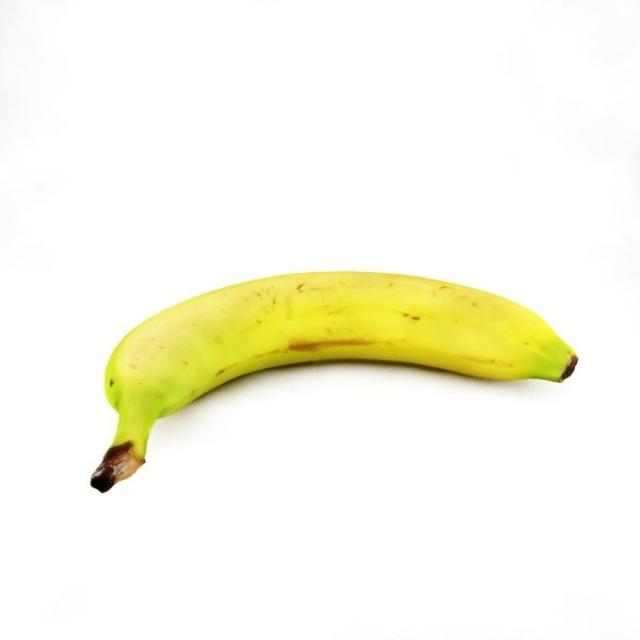

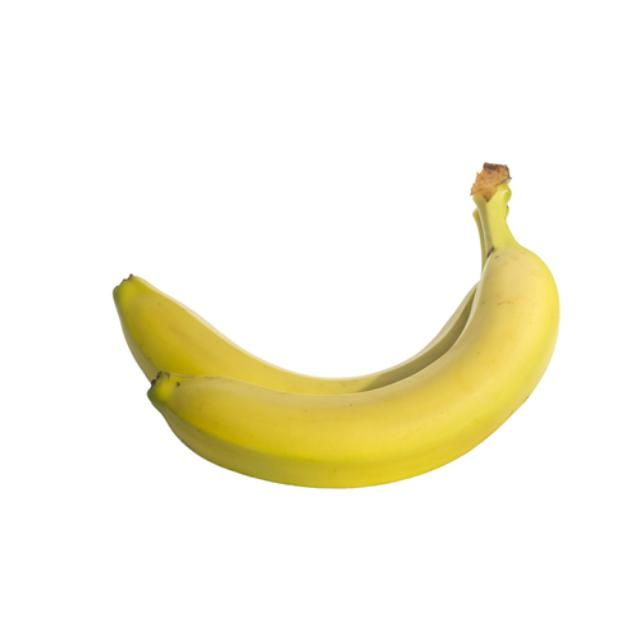

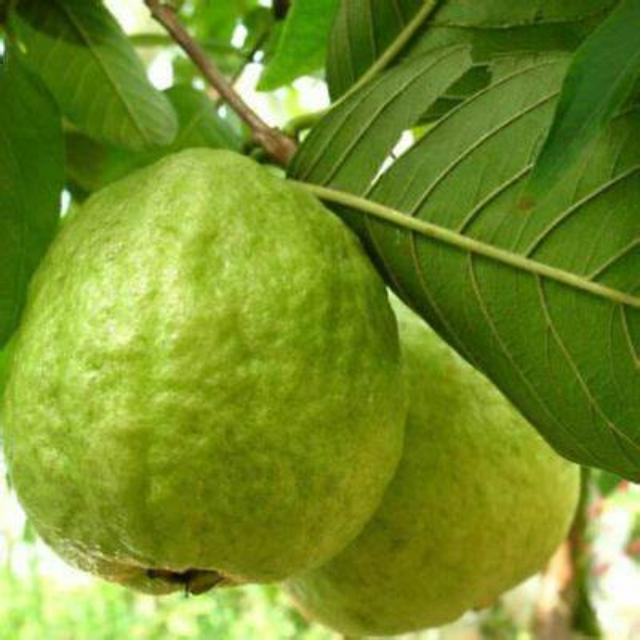

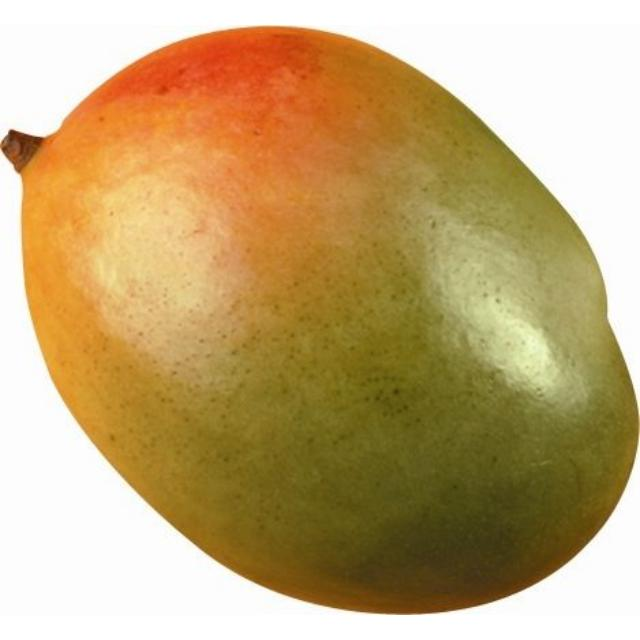

In [ ]:
import glob
from IPython.display import display, Image

for image_path in glob.glob(f'/content/fruit-calories-3/valid/images/*.jpg')[:5]:
  display(Image(filename=image_path, width=600))
  print('\n')


In [ ]:
!yolo task=segment mode = predict  model = /content/runs/segment/train/weights/best.pt conf = 0.25 source ={dataset.location}/valid/images

Ultralytics YOLOv8.2.100 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-seg summary (fused): 245 layers, 27,225,858 parameters, 0 gradients, 110.0 GFLOPs

image 1/27 /content/fruit-calories-3/valid/images/100_jpeg.rf.23c4541bd271019e40471ed88cab765f.jpg: 640x640 1 orange, 45.8ms
image 2/27 /content/fruit-calories-3/valid/images/102_jpg.rf.9e5d74ef7c6f1800e7e84d30f900be8a.jpg: 640x640 2 bananas, 40.5ms
image 3/27 /content/fruit-calories-3/valid/images/113_jpeg.rf.2e5bd4edd42769d5a273c3d443469686.jpg: 640x640 3 bananas, 40.4ms
image 4/27 /content/fruit-calories-3/valid/images/115_jpeg.rf.55ca184763338b771b23f50d8bee5daa.jpg: 640x640 3 guavas, 36.7ms
image 5/27 /content/fruit-calories-3/valid/images/116_jpg.rf.cb6fff2f1de54265c38bb22f546f4f77.jpg: 640x640 1 banana, 35.2ms
image 6/27 /content/fruit-calories-3/valid/images/126_jpeg.rf.74417f5847899e0a9a254cdc17fef6de.jpg: 640x640 6 bananas, 35.2ms
image 7/27 /content/fruit-calories-3/valid/images/127_jpg.rf.0b70a4521

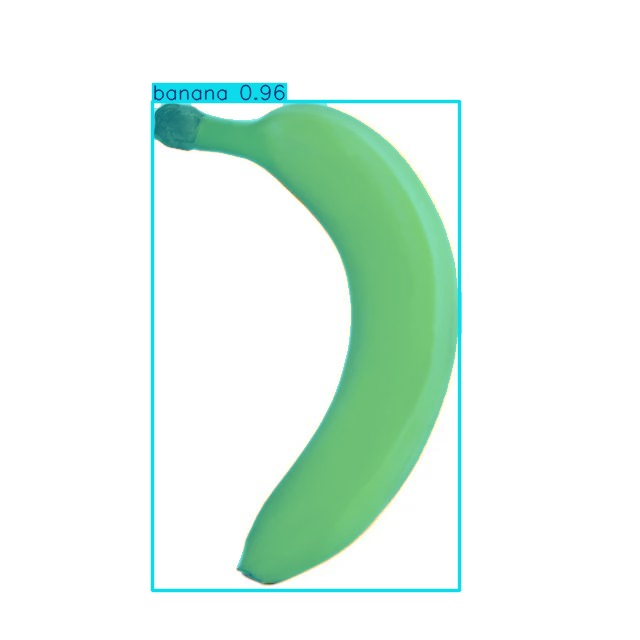

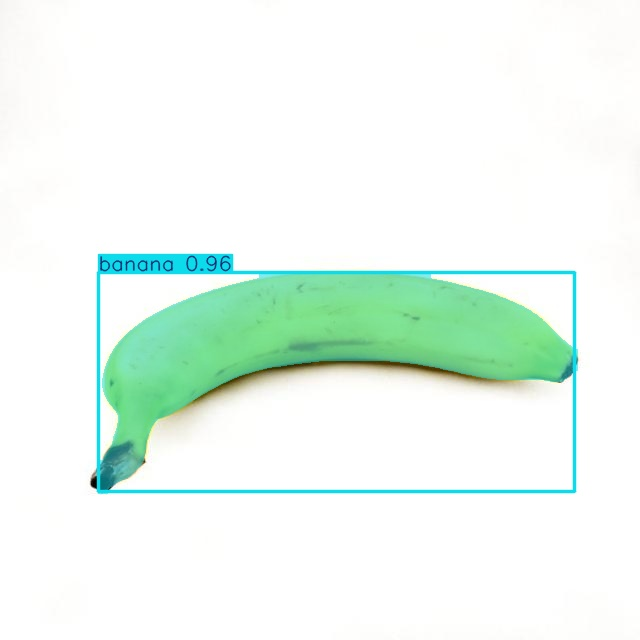

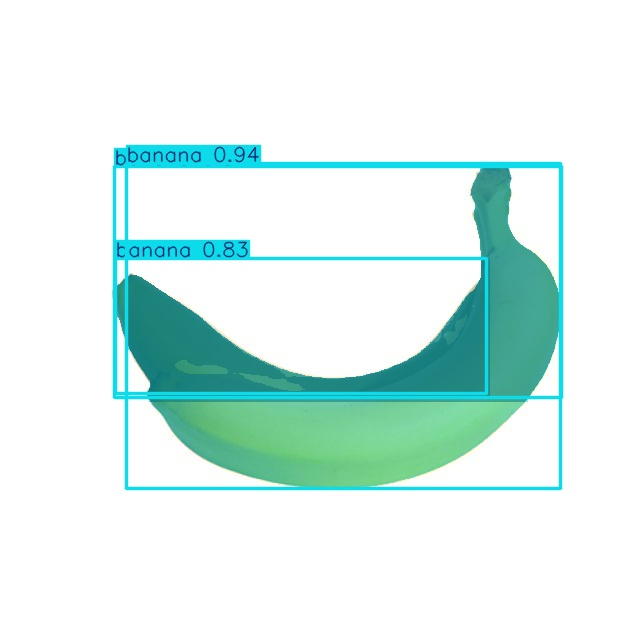

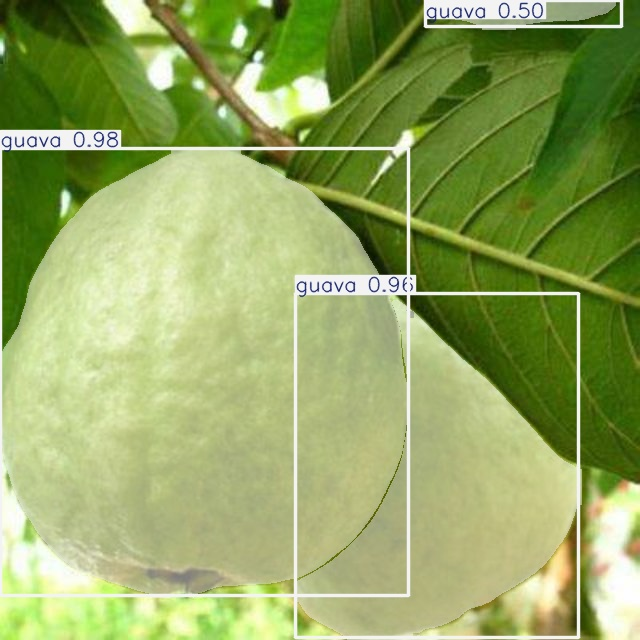

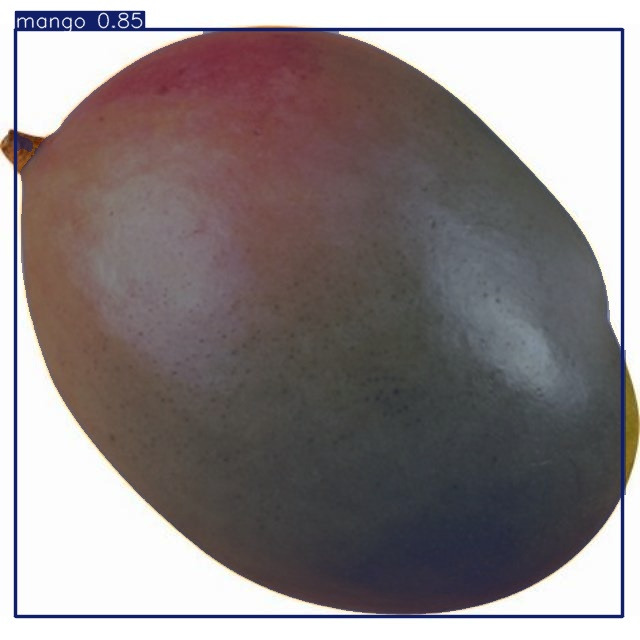

In [ ]:
import glob
from IPython.display import display, Image

for image_path in glob.glob(f'/content/runs/segment/predict/*.jpg')[:5]:
  display(Image(filename=image_path, width=600))
  print('\n')
